In [53]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [55]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255, test_images / 255

In [57]:
import pandas as pd
labels = pd.read_csv(r"cifar100_labels.csv", header=None, index_col=0)


In [58]:
labels.head()

,1
0,
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver


In [59]:
print("Shape of training images:", train_images.shape)
print("Shape of testing images:", test_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of training labels:", test_labels.shape)

Shape of training images: (50000, 32, 32, 3)
Shape of testing images: (10000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of training labels: (10000, 1)


In [60]:
import numpy as np


In [61]:
print(np.unique(train_labels))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


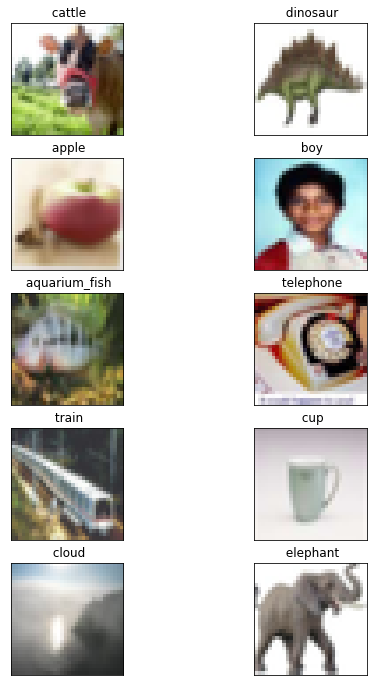

In [62]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(train_images[i])
    plt.title(labels[1][train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
#  print(training_labels[i])
plt.show()

In [64]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(train_labels)), activation = 'softmax')
                             
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 2048)             

In [65]:
from keras.callbacks import EarlyStopping


In [66]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=2)


### Compile and train the model

In [67]:
model.compile(optimizer='adam',
              loss="SparseCategoricalCrossentropy",
              metrics=['accuracy'])



In [68]:
history = model.fit(train_images, train_labels, epochs=50 ,callbacks=[early_stop],
                    validation_data=(test_images, test_labels))



Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 3.7299 - accuracy: 0.1313 - val_loss: 3.2626 - val_accuracy: 0.2072
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9756 - accuracy: 0.2616 - val_loss: 2.7765 - val_accuracy: 0.3069
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.6176 - accuracy: 0.3338 - val_loss: 2.6465 - val_accuracy: 0.3339
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3621 - accuracy: 0.3850 - val_loss: 2.5635 - val_accuracy: 0.3546
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.1486 - accuracy: 0.4314 - val_loss: 2.5221 - val_accuracy: 0.3697
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9704 - accuracy: 0.4696 - val_loss: 2.5102 - val_accuracy: 0.3785
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8110 - accuracy: 0.5056 - val_loss: 2.5193 - val_accuracy:

In [69]:
import numpy as np

prob = model.predict(test_images)
pred = np.argmax(prob,axis=1)

In [70]:
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix

In [71]:
print(accuracy_score(test_labels,pred))

0.384


In [72]:
print(log_loss(test_labels, prob))

2.5688205353906253


In [74]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.5688 - accuracy: 0.3840


[2.568819999694824, 0.3840000033378601]

In [73]:
confusion_matrix(test_labels, pred)


array([[71,  3,  2, ...,  0,  0,  0],
       [ 4, 44,  0, ...,  1,  0,  0],
       [ 2,  0, 20, ...,  1,  4,  1],
       ...,
       [ 0,  1,  0, ..., 44,  0,  1],
       [ 2,  0,  6, ...,  2, 19,  1],
       [ 0,  0,  0, ...,  2,  0, 15]])

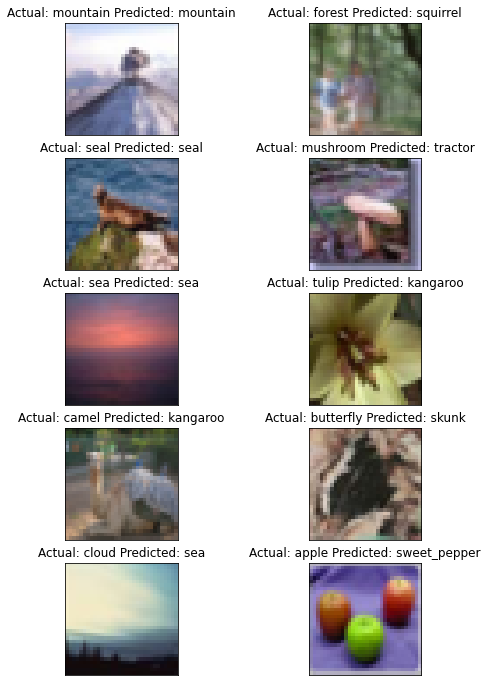

In [75]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images[i])
    string = "Actual:"+ labels[1][test_labels[i][0]] + " Predicted:" + labels[1][pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()